In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# We are going to use PCA in order to analyze the performance of particular models after reduction of features

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.datasets import load_digits
import pandas as pd

df = load_digits()


In [74]:
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [75]:
df.data.shape

(1797, 64)

In [76]:
df.data[1796]

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

<Figure size 640x480 with 0 Axes>

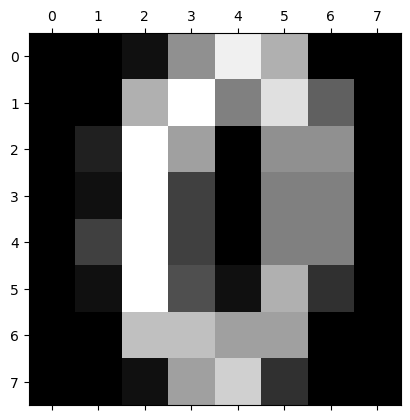

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
plt.matshow(df.data[10].reshape(8,8))

In [79]:
df.data[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

# 1797 images and each image has 64 features/pixels (8*8)

In [80]:
df.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [81]:
df.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [82]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [83]:
df.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [84]:
df2 = pd.DataFrame(df.data, columns=df.feature_names)
df2.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [85]:
df.target

array([0, 1, 2, ..., 8, 9, 8])

In [86]:
X = df2
y = df.target

In [93]:
from sklearn.preprocessing import StandardScaler ,MinMaxScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [94]:
mm=MinMaxScaler()
X_scale=mm.fit_transform(X)
X_scale

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [90]:
from sklearn.naive_bayes import MultinomialNB

In [95]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scale, y, test_size=0.2, random_state=30)

In [96]:
nb = MultinomialNB()
nb.fit(X_train1, y_train1)
nb.score(X_test1, y_test1)

0.9083333333333333

# Now lets whether reduction of features influences model's performace or not.

In [97]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [98]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [99]:
pca.n_components_

29

In [107]:
mm=MinMaxScaler()
X_scale2=mm.fit_transform(X_pca)
X_scale2

array([[0.47575034, 0.84688602, 0.31992419, ..., 0.71851161, 0.41543365,
        0.36864013],
       [0.62235561, 0.11679353, 0.54412071, ..., 0.62861599, 0.44034769,
        0.56711349],
       [0.60699553, 0.30455775, 0.52023853, ..., 0.75222617, 0.59369651,
        0.48212765],
       ...,
       [0.66758658, 0.35657907, 0.56282797, ..., 0.28118381, 0.57454358,
        0.63768451],
       [0.4182884 , 0.69318843, 0.30850982, ..., 0.69329542, 0.52455921,
        0.3797873 ],
       [0.49030539, 0.58798342, 0.6462678 , ..., 0.31454768, 0.54425662,
        0.58292627]])

In [110]:
X_train_pca1, X_test_pca1, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=30)

# Before PCA Logistic Regresion had 97% accuracy and now you can see after applying pca , model still performs approx 96 %, so its amazing

In [111]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_pca1, y_train2)
model1.score(X_test_pca1, y_test2)

0.9694444444444444

In [112]:
X_train_pca2, X_test_pca2, y_train3, y_test3 = train_test_split(X_scale2, y, test_size=0.2, random_state=30)

# Before PCA Naive Bayes classifier had 90% accuracy and now you can see after applying pca , model still performs approx 90 %, so its amazing

In [113]:
nb = MultinomialNB()
nb.fit(X_train_pca2, y_train3)
nb.score(X_test_pca2, y_test3)

0.8944444444444445

# You can see the model is not overfitting as  test acuracy is very close to train accuracy score

In [114]:
nb = MultinomialNB()
nb.fit(X_train_pca2, y_train3)
nb.score(X_train_pca2, y_train3) 

0.9102296450939458